In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.impute import KNNImputer
import missingno as msno

In [2]:
sns.set()

In [3]:
raw_data = pd.read_csv('./Muestra de entrenamiento.csv', header=0, sep=';')

C:\Users\itrujillo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Primero codificaremos las variables cualitativas

In [4]:
raw_data.head()

id  num_expediente  ecv_10_anos_despues cod_sexo  \
0  68719545489               4                    0        V   
1        63247               7                    0        V   
2  25769809582               9                    0        M   
3  60129593759              11                    0        M   
4  60129542144              12                    0        V   

   edad_hace_10_anos  diabetes  hipertension  hipercolesterolemia  tabaquismo  \
0                 52         1             1                    0           0   
1                 56         0             1                    1           0   
2                 39         0             0                    1           1   
3                 46         0             0                    0           1   
4                 47         0             1                    0           1   

   hipertrofia_vent_izq  antefami_ecv  hdl  ldl colesterol coc_alb_crea  \
0                     0             0   51   97        165          NaN   
1                     0             0   73  151        261         1,79   
2                     0             0   58  186        277         3,85   
3                     0             0  NaN  NaN        238          NaN   
4                     0             0   40  113        242         4,06   

     tad    tas  
0   90.0  130.0  
1   85.0  130.0  
2   70.0  130.0  
3   93.0  110.0  
4  102.0  139.0

In [5]:
raw_data['cod_sexo'] = raw_data['cod_sexo'].astype('category')

In [6]:
raw_data.head()

id  num_expediente  ecv_10_anos_despues cod_sexo  \
0  68719545489               4                    0        V   
1        63247               7                    0        V   
2  25769809582               9                    0        M   
3  60129593759              11                    0        M   
4  60129542144              12                    0        V   

   edad_hace_10_anos  diabetes  hipertension  hipercolesterolemia  tabaquismo  \
0                 52         1             1                    0           0   
1                 56         0             1                    1           0   
2                 39         0             0                    1           1   
3                 46         0             0                    0           1   
4                 47         0             1                    0           1   

   hipertrofia_vent_izq  antefami_ecv  hdl  ldl colesterol coc_alb_crea  \
0                     0             0   51   97        165          NaN   
1                     0             0   73  151        261         1,79   
2                     0             0   58  186        277         3,85   
3                     0             0  NaN  NaN        238          NaN   
4                     0             0   40  113        242         4,06   

     tad    tas  
0   90.0  130.0  
1   85.0  130.0  
2   70.0  130.0  
3   93.0  110.0  
4  102.0  139.0

In [7]:
raw_data.dtypes

id                         int64
num_expediente             int64
ecv_10_anos_despues        int64
cod_sexo                category
edad_hace_10_anos          int64
diabetes                   int64
hipertension               int64
hipercolesterolemia        int64
tabaquismo                 int64
hipertrofia_vent_izq       int64
antefami_ecv               int64
hdl                       object
ldl                       object
colesterol                object
coc_alb_crea              object
tad                       object
tas                       object
dtype: object

Veamos si hay alguna persona repetida

In [8]:
raw_data['num_expediente'].is_unique

True

Lo podemos quitar para anonimizar los datos por completo

In [9]:
raw_data = raw_data.drop('num_expediente', axis=1)

In [10]:
raw_data.shape

(1146638, 16)

Estos son los valores perdidos que tenemos

In [11]:
raw_data.shape

(1146638, 16)

In [12]:
sum(raw_data['hdl'].isna())

686385

In [13]:
sum(raw_data['ldl'].isna())

714512

In [14]:
sum(raw_data['colesterol'].isna())

608393

In [15]:
sum(raw_data['coc_alb_crea'].isna())

1054377

In [16]:
sum(raw_data['tad'].isna())

643812

In [17]:
sum(raw_data['tas'].isna())

643026

Solo nos preocupan las que introduciremos en el modelo: edad, el sexo, TAS, colesterol total, HDL, tabaquismo, diabetes, hipertensión, hipercolesterolemia e hipertrofia ventricular izquierda. De estas solo TAS, colesterol total y HDL tienen valores perdidos. Los imputaremos por completo

In [18]:
msno.matrix(raw_data)

<AxesSubplot:>

<AxesSubplot:>

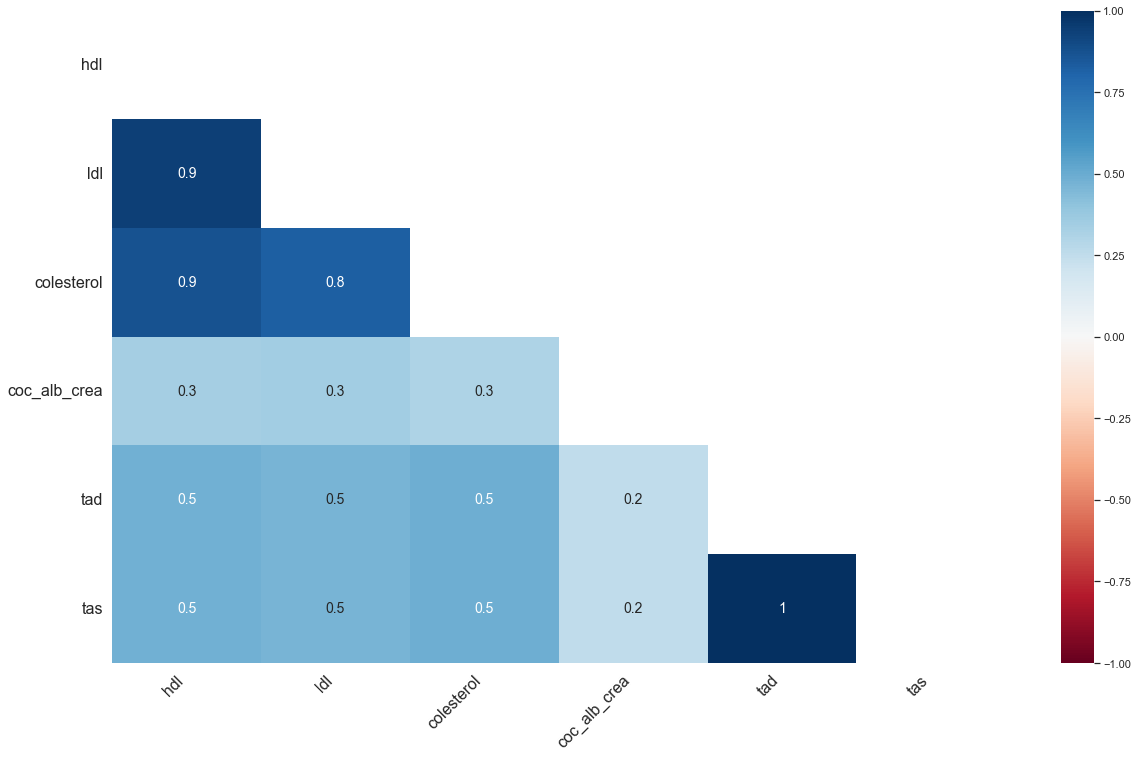

In [19]:
msno.heatmap(raw_data)

In [20]:
raw_data.dtypes

id                         int64
ecv_10_anos_despues        int64
cod_sexo                category
edad_hace_10_anos          int64
diabetes                   int64
hipertension               int64
hipercolesterolemia        int64
tabaquismo                 int64
hipertrofia_vent_izq       int64
antefami_ecv               int64
hdl                       object
ldl                       object
colesterol                object
coc_alb_crea              object
tad                       object
tas                       object
dtype: object

Antes de imputar:

### Convertir a número

In [21]:
raw_data.loc[:,'hdl'] = raw_data['hdl'].str.replace(',', '.', regex=True)
raw_data.loc[:,'ldl'] = raw_data['ldl'].str.replace(',', '.', regex=True)
raw_data.loc[:,'colesterol'] = raw_data['colesterol'].str.replace(',', '.', regex=True)
raw_data.loc[:,'coc_alb_crea'] = raw_data['coc_alb_crea'].str.replace(',', '.', regex=True)

In [22]:
raw_data.loc[:,'hdl'] = pd.to_numeric(raw_data['hdl'], errors='coerce')
raw_data.loc[:,'ldl'] = pd.to_numeric(raw_data['ldl'], errors='coerce')
raw_data.loc[:,'colesterol'] = pd.to_numeric(raw_data['colesterol'], errors='coerce')
raw_data.loc[:,'coc_alb_crea'] = pd.to_numeric(raw_data['coc_alb_crea'], errors='coerce')
raw_data.loc[:,'tad'] = pd.to_numeric(raw_data['tad'], errors='coerce')
raw_data.loc[:,'tas'] = pd.to_numeric(raw_data['tas'], errors='coerce')

In [23]:
raw_data.dtypes

id                         int64
ecv_10_anos_despues        int64
cod_sexo                category
edad_hace_10_anos          int64
diabetes                   int64
hipertension               int64
hipercolesterolemia        int64
tabaquismo                 int64
hipertrofia_vent_izq       int64
antefami_ecv               int64
hdl                      float64
ldl                      float64
colesterol               float64
coc_alb_crea             float64
tad                      float64
tas                      float64
dtype: object

In [24]:
raw_data.shape

(1146638, 16)

### Outliers

In [25]:
class OutlierRemover(BaseEstimator):
    def __init__(self, percentil_inf=0.01, percentil_sup=0.99):
        self.percentil_inf = percentil_inf
        self.percentil_sup = percentil_sup

    def fit(self, X, y=None):
        return self

    def transform(self, X, columns):
        for col in columns:
            p01 = X[col].quantile(self.percentil_inf)
            p99 = X[col].quantile(self.percentil_sup)
            X = X[(X[col] > p01) & (X[col] < p99) | X[col].isna()]
        return X

In [26]:
with_outliers = raw_data.copy()

In [27]:
outlier_remover = OutlierRemover(percentil_inf=0.001, percentil_sup=0.999)

In [28]:
with_outliers = outlier_remover.transform(with_outliers, ['hdl', 'colesterol', 'tas'])

In [29]:
with_outliers.isnull().sum()

id                            0
ecv_10_anos_despues           0
cod_sexo                      0
edad_hace_10_anos             0
diabetes                      0
hipertension                  0
hipercolesterolemia           0
tabaquismo                    0
hipertrofia_vent_izq          0
antefami_ecv                  0
hdl                      686570
ldl                      716322
colesterol               608576
coc_alb_crea            1060229
tad                      643278
tas                      642537
dtype: int64

In [30]:
with_outliers.shape

(1142644, 16)

In [31]:
with_outliers.describe()

id  ecv_10_anos_despues  edad_hace_10_anos      diabetes  \
count  1.142644e+06         1.142644e+06       1.142644e+06  1.142644e+06   
mean   4.947742e+10         6.277546e-02       4.693765e+01  6.935756e-02   
std    3.103887e+10         2.425588e-01       1.140055e+01  2.540613e-01   
min    0.000000e+00         0.000000e+00       3.000000e+01  0.000000e+00   
25%    2.576982e+10         0.000000e+00       3.800000e+01  0.000000e+00   
50%    5.153963e+10         0.000000e+00       4.500000e+01  0.000000e+00   
75%    7.730945e+10         0.000000e+00       5.500000e+01  0.000000e+00   
max    1.030793e+11         1.000000e+00       7.500000e+01  1.000000e+00   

       hipertension  hipercolesterolemia    tabaquismo  hipertrofia_vent_izq  \
count  1.142644e+06         1.142644e+06  1.142644e+06          1.142644e+06   
mean   1.695944e-01         1.459877e-01  1.677408e-01          4.175404e-03   
std    3.752762e-01         3.530941e-01  3.736361e-01          6.448235e-02   
min    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
50%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
75%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
max    1.000000e+00         1.000000e+00  1.000000e+00          1.000000e+00   

       antefami_ecv            hdl            ldl     colesterol  \
count  1.142644e+06  456074.000000  426322.000000  534068.000000   
mean   1.137712e-05      54.132906     131.632081     208.530835   
std    3.372981e-03      15.297997     390.525771      39.716621   
min    0.000000e+00      19.300000     -66.000000      93.000000   
25%    0.000000e+00      44.000000     105.000000     181.000000   
50%    0.000000e+00      52.000000     128.000000     206.000000   
75%    0.000000e+00      62.000000     153.000000     233.000000   
max    1.000000e+00     274.000000  165110.000000     381.000000   

       coc_alb_crea            tad            tas  
count  82415.000000  499366.000000  500107.000000  
mean      15.757142      77.969908     126.760013  
std       83.181145      14.047948      17.342242  
min     -240.150000       0.000000      81.000000  
25%        2.190000      70.000000     115.000000  
50%        3.990000      80.000000     125.000000  
75%        8.800000      85.000000     140.000000  
max    12879.000000    6080.000000     199.000000

### Imputamos valores

In [32]:
knn_imp = KNNImputer(n_neighbors=5)

In [63]:
knn_imputed = with_outliers.copy(deep=True)

In [34]:
tmp_imputed = knn_imp.fit_transform(knn_imputed[['hdl', 'colesterol', 'tas']])

In [35]:
tmp_imputed

array([[ 51.        , 165.        , 130.        ],
       [ 73.        , 261.        , 130.        ],
       [ 58.        , 277.        , 130.        ],
       ...,
       [ 98.        , 205.4       , 120.        ],
       [ 54.13290565, 208.53083514, 126.76001336],
       [ 54.13290565, 208.53083514, 126.76001336]])

In [64]:
knn_imputed[['hdl', 'colesterol', 'tas']] = tmp_imputed

In [37]:
knn_imputed.isnull().sum()

id                            0
ecv_10_anos_despues           0
cod_sexo                      0
edad_hace_10_anos             0
diabetes                      0
hipertension                  0
hipercolesterolemia           0
tabaquismo                    0
hipertrofia_vent_izq          0
antefami_ecv                  0
hdl                           0
ldl                      716322
colesterol                    0
coc_alb_crea            1060229
tad                      643278
tas                           0
dtype: int64

In [38]:
knn_imputed.describe()

id  ecv_10_anos_despues  edad_hace_10_anos      diabetes  \
count  1.142644e+06         1.142644e+06       1.142644e+06  1.142644e+06   
mean   4.947742e+10         6.277546e-02       4.693765e+01  6.935756e-02   
std    3.103887e+10         2.425588e-01       1.140055e+01  2.540613e-01   
min    0.000000e+00         0.000000e+00       3.000000e+01  0.000000e+00   
25%    2.576982e+10         0.000000e+00       3.800000e+01  0.000000e+00   
50%    5.153963e+10         0.000000e+00       4.500000e+01  0.000000e+00   
75%    7.730945e+10         0.000000e+00       5.500000e+01  0.000000e+00   
max    1.030793e+11         1.000000e+00       7.500000e+01  1.000000e+00   

       hipertension  hipercolesterolemia    tabaquismo  hipertrofia_vent_izq  \
count  1.142644e+06         1.142644e+06  1.142644e+06          1.142644e+06   
mean   1.695944e-01         1.459877e-01  1.677408e-01          4.175404e-03   
std    3.752762e-01         3.530941e-01  3.736361e-01          6.448235e-02   
min    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
50%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
75%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
max    1.000000e+00         1.000000e+00  1.000000e+00          1.000000e+00   

       antefami_ecv           hdl            ldl    colesterol  coc_alb_crea  \
count  1.142644e+06  1.142644e+06  426322.000000  1.142644e+06  82415.000000   
mean   1.137712e-05  5.403365e+01     131.632081  2.085818e+02     15.757142   
std    3.372981e-03  1.034596e+01     390.525771  2.748665e+01     83.181145   
min    0.000000e+00  1.930000e+01     -66.000000  9.300000e+01   -240.150000   
25%    0.000000e+00  5.100000e+01     105.000000  2.018000e+02      2.190000   
50%    0.000000e+00  5.413291e+01     128.000000  2.085308e+02      3.990000   
75%    0.000000e+00  5.460000e+01     153.000000  2.114000e+02      8.800000   
max    1.000000e+00  2.740000e+02  165110.000000  3.810000e+02  12879.000000   

                 tad           tas  
count  499366.000000  1.142644e+06  
mean       77.969908  1.266465e+02  
std        14.047948  1.189996e+01  
min         0.000000  8.100000e+01  
25%        70.000000  1.220000e+02  
50%        80.000000  1.267600e+02  
75%        85.000000  1.294000e+02  
max      6080.000000  1.990000e+02

In [39]:
def dibujar_histogramas(X, columns):
    filas = (len(columns) // 3)
    fig, axs = plt.subplots(filas, 3, figsize=(30, 20))
    nrow = 0
    ncol = 0
    for col in columns:
        if len(X[col].unique()) == 2:
            axs[nrow, ncol].bar(['0','1'], X[col].value_counts())
        else:
            axs[nrow, ncol].hist(X[col])
        axs[nrow, ncol].set_title(col)
        if ncol == 2:
            ncol = 0
            nrow += 1
        else:
            ncol += 1
    # plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.show()

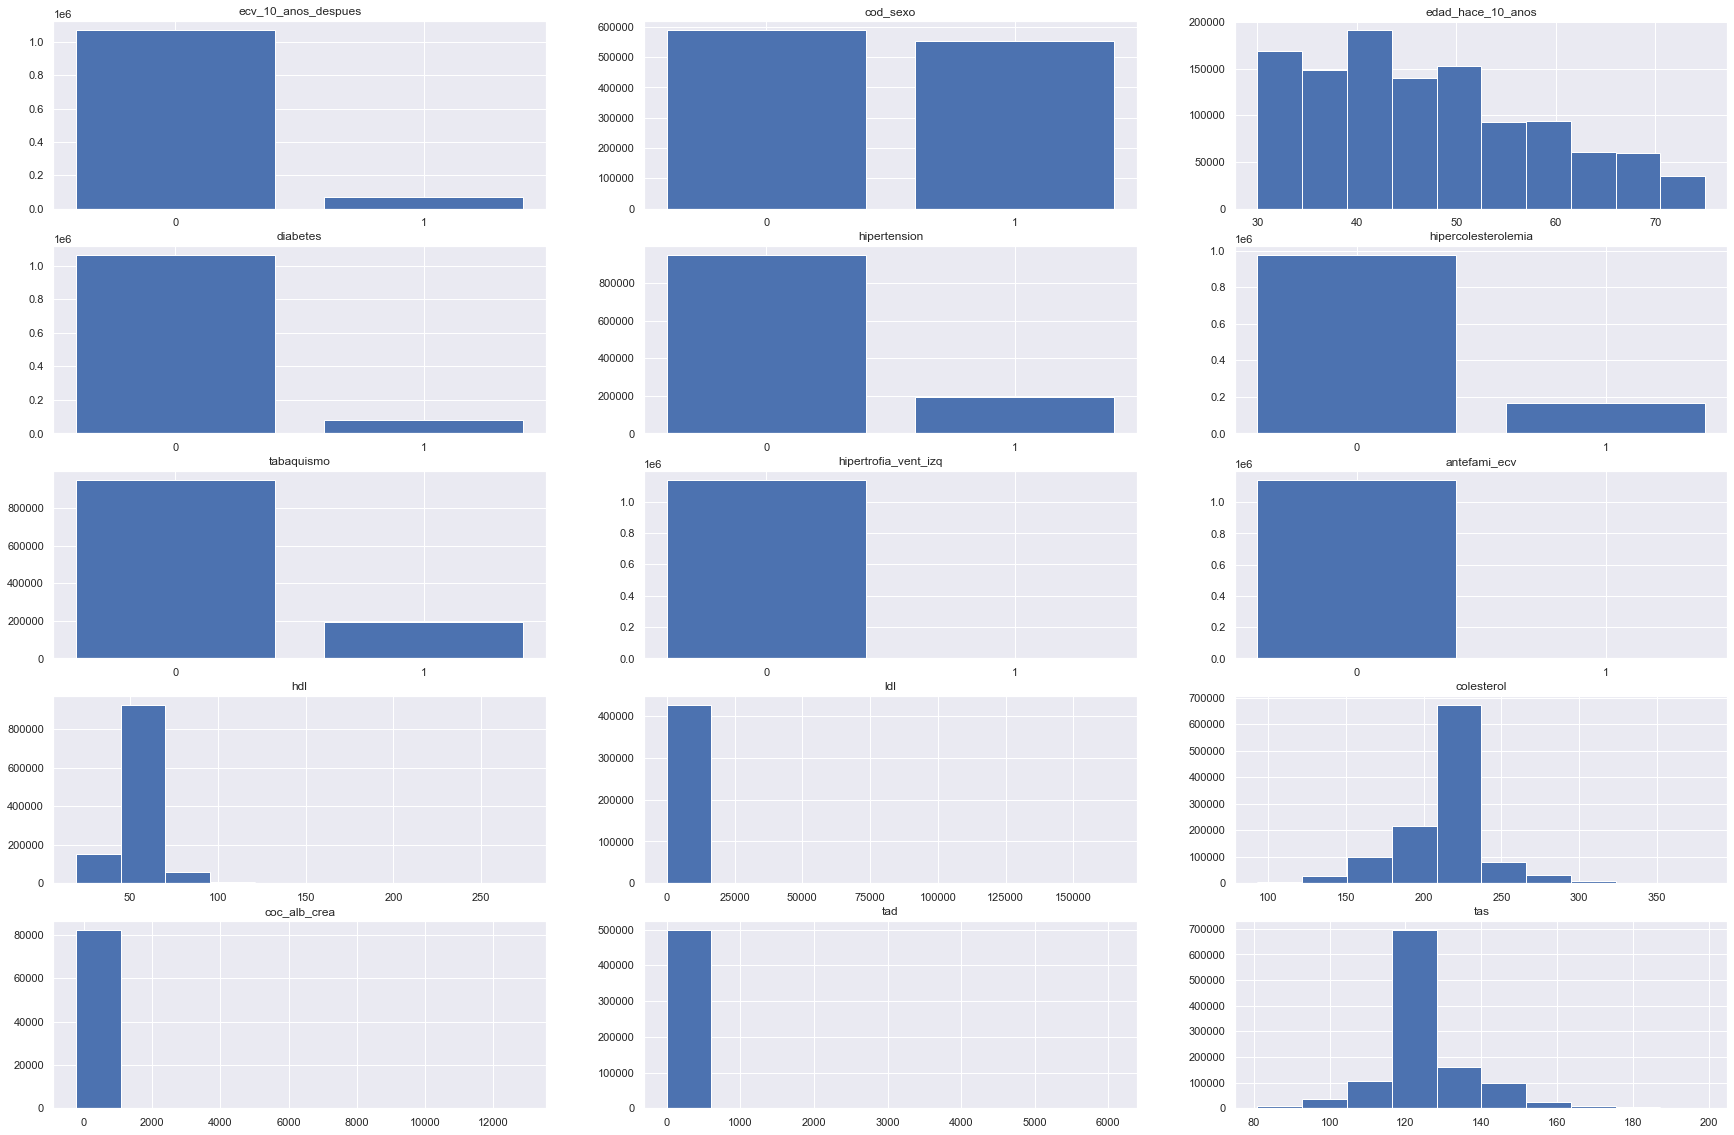

In [40]:
dibujar_histogramas(knn_imputed, knn_imputed.drop('id', axis=1).columns)

In [43]:
def dibujar_un_histograma(X, column):
    fig, axs = plt.subplots(figsize=(15, 10))
    if len(X[column].unique()) == 2:
        plt.bar(['0','1'], X[column].value_counts())
    else:
        plt.hist(X[column])
    axs.set_title(column)
    plt.show()

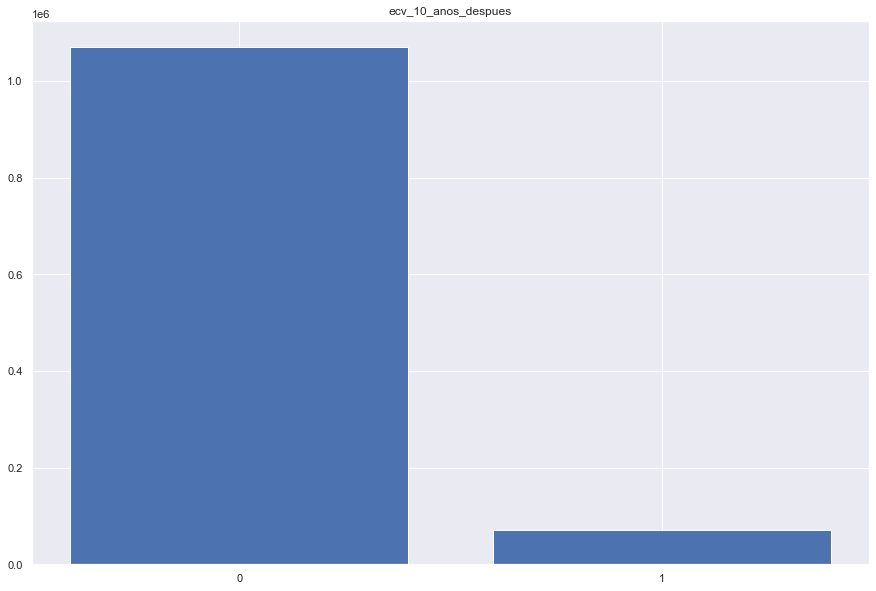

In [44]:
dibujar_un_histograma(knn_imputed, 'ecv_10_anos_despues')

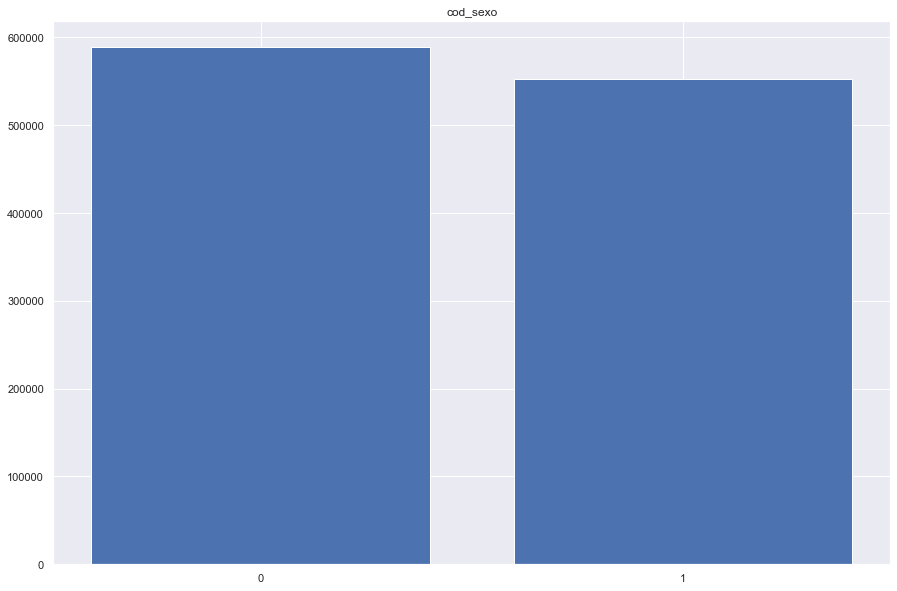

In [45]:
dibujar_un_histograma(knn_imputed, 'cod_sexo')

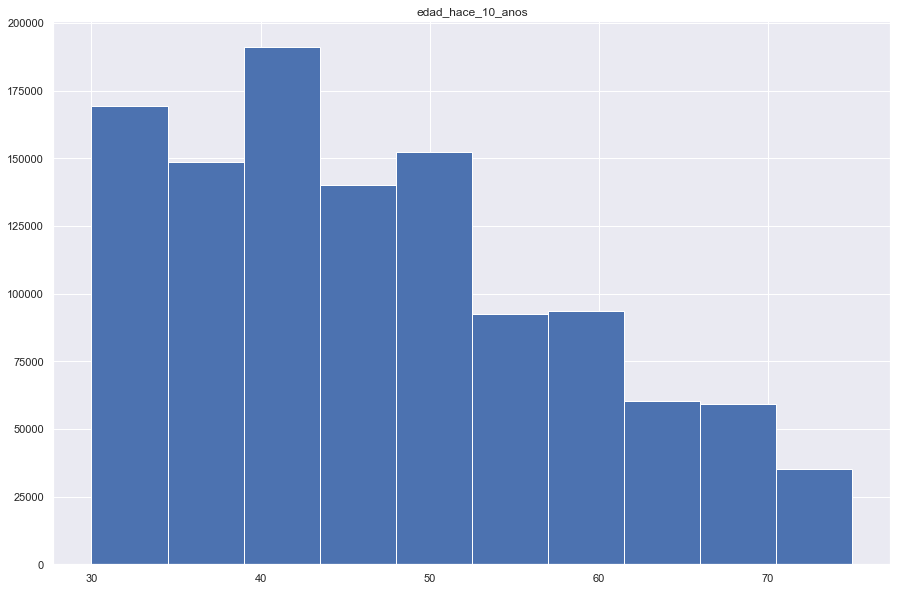

In [46]:
dibujar_un_histograma(knn_imputed, 'edad_hace_10_anos')

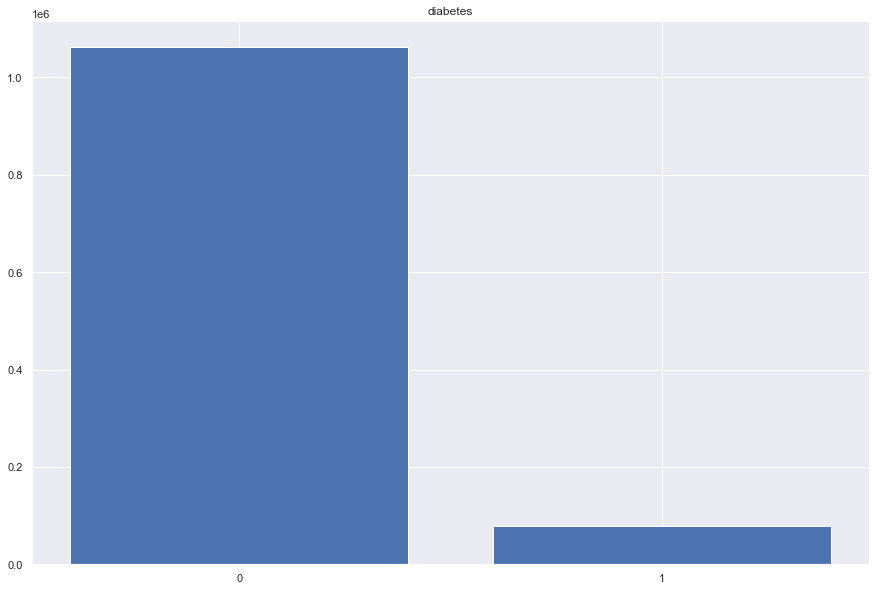

In [47]:
dibujar_un_histograma(knn_imputed, 'diabetes')

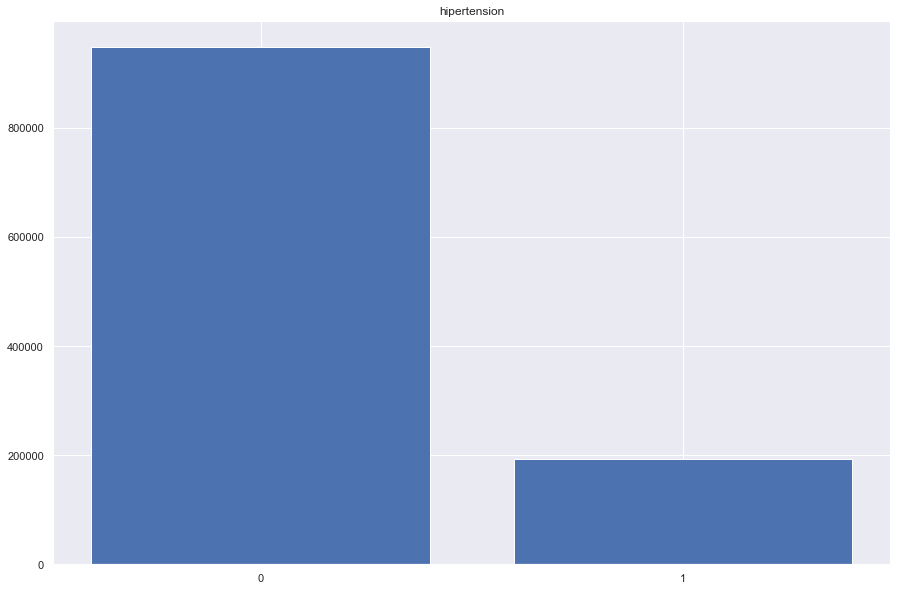

In [48]:
dibujar_un_histograma(knn_imputed, 'hipertension')

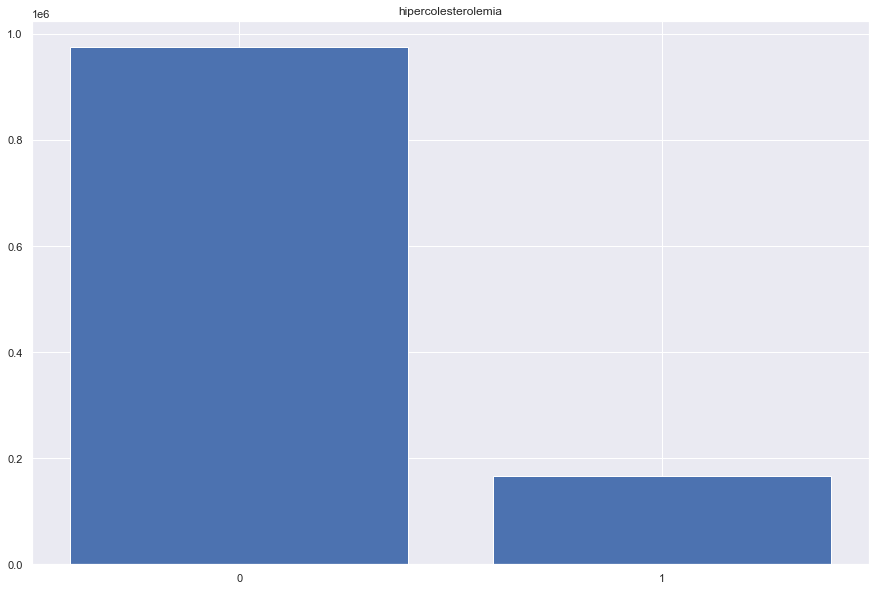

In [82]:
dibujar_un_histograma(knn_imputed, 'hipercolesterolemia')

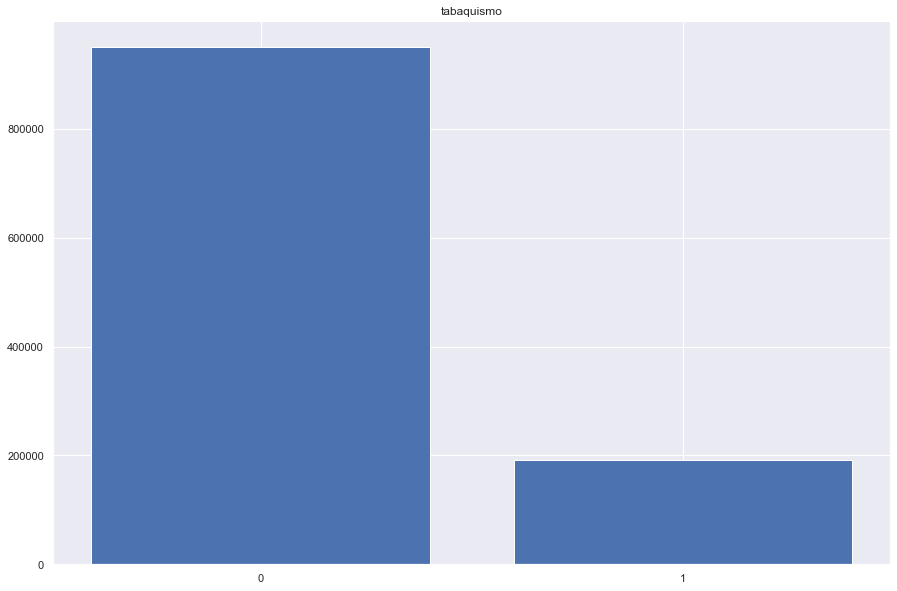

In [49]:
dibujar_un_histograma(knn_imputed, 'tabaquismo')

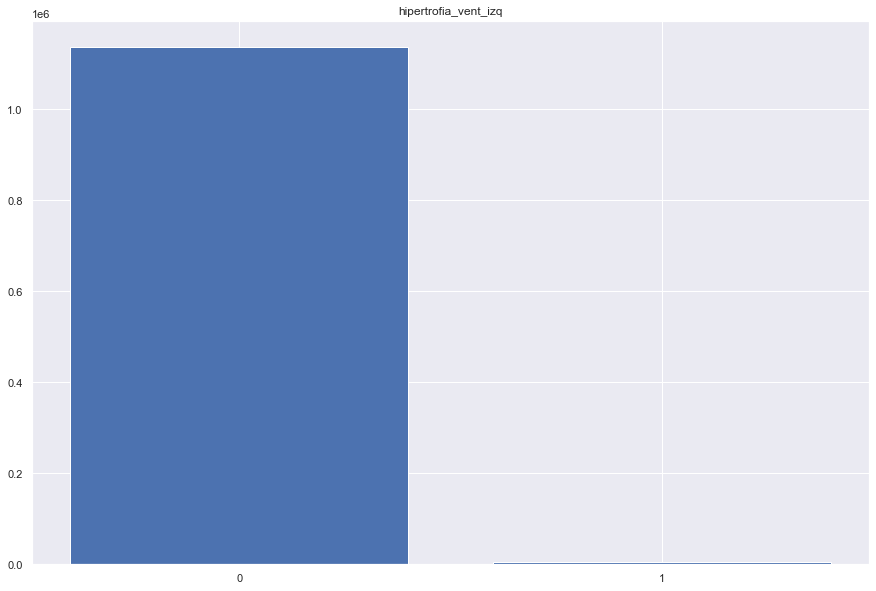

In [51]:
dibujar_un_histograma(knn_imputed, 'hipertrofia_vent_izq')

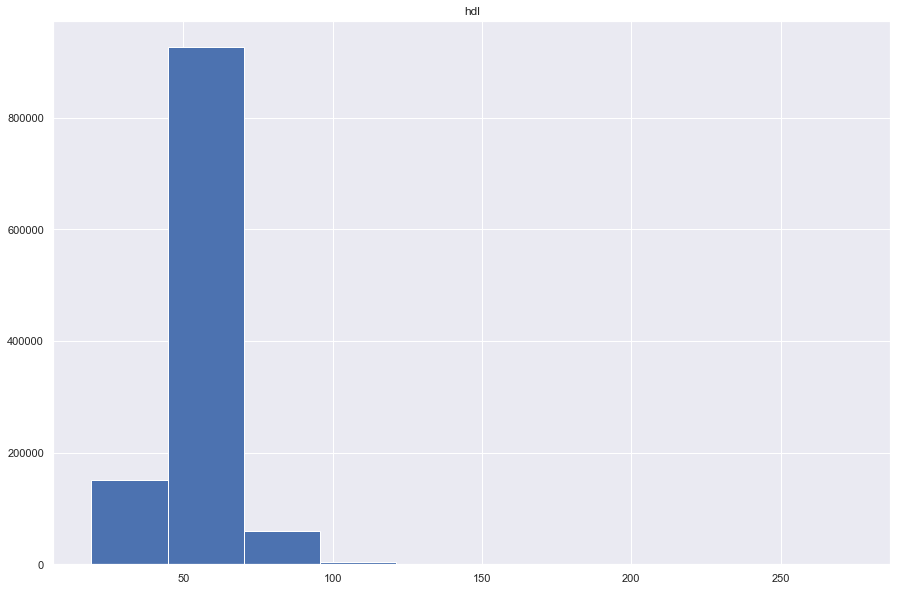

In [52]:
dibujar_un_histograma(knn_imputed, 'hdl')

In [53]:
dibujar_un_histograma(knn_imputed, 'colesterol')

In [54]:
dibujar_un_histograma(knn_imputed, 'tas')

### Estandarizamos

In [65]:
class StandardScalerPandas(BaseEstimator):
    def __init__(self):
        BaseEstimator.__init__(self)
        self.ss = StandardScaler()
        self.means = []
        self.vars = []

    def fit(self, X, y=None):
        return self

    def fit_transform(self, X, columns):
        for col in columns:
            X_np = self.ss.fit_transform(X[col].to_numpy().reshape(-1, 1))
            self.means.append(self.ss.mean_)
            self.vars.append(self.ss.var_)
            X[col] = X_np
        return X

In [66]:
scaler_pandas = StandardScalerPandas()

In [67]:
data_scaled = scaler_pandas.fit_transform(knn_imputed, ['edad_hace_10_anos', 'hdl', 'ldl', 'colesterol', 'coc_alb_crea', 'tad', 'tas'])

In [68]:
scaler_pandas.means

[array([46.93765075]),
 array([54.03365385]),
 array([131.63208113]),
 array([208.58182115]),
 array([15.75714204]),
 array([77.96990784]),
 array([126.64653733])]

In [69]:
np.sqrt(scaler_pandas.vars)

array([[ 11.40054646],
       [ 10.34595305],
       [390.52531316],
       [ 27.48663418],
       [ 83.18063986],
       [ 14.04793374],
       [ 11.89995648]])

In [70]:
data_scaled.describe()

id  ecv_10_anos_despues  edad_hace_10_anos      diabetes  \
count  1.142644e+06         1.142644e+06       1.142644e+06  1.142644e+06   
mean   4.947742e+10         6.277546e-02       3.188338e-14  6.935756e-02   
std    3.103887e+10         2.425588e-01       1.000000e+00  2.540613e-01   
min    0.000000e+00         0.000000e+00      -1.485688e+00  0.000000e+00   
25%    2.576982e+10         0.000000e+00      -7.839669e-01  0.000000e+00   
50%    5.153963e+10         0.000000e+00      -1.699612e-01  0.000000e+00   
75%    7.730945e+10         0.000000e+00       7.071897e-01  0.000000e+00   
max    1.030793e+11         1.000000e+00       2.461492e+00  1.000000e+00   

       hipertension  hipercolesterolemia    tabaquismo  hipertrofia_vent_izq  \
count  1.142644e+06         1.142644e+06  1.142644e+06          1.142644e+06   
mean   1.695944e-01         1.459877e-01  1.677408e-01          4.175404e-03   
std    3.752762e-01         3.530941e-01  3.736361e-01          6.448235e-02   
min    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
50%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
75%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
max    1.000000e+00         1.000000e+00  1.000000e+00          1.000000e+00   

       antefami_ecv           hdl           ldl    colesterol  coc_alb_crea  \
count  1.142644e+06  1.142644e+06  4.263220e+05  1.142644e+06  8.241500e+04   
mean   1.137712e-05 -7.093633e-14  1.141660e-16  6.202987e-14 -7.524245e-16   
std    3.372981e-03  1.000000e+00  1.000001e+00  1.000000e+00  1.000006e+00   
min    0.000000e+00 -3.357221e+00 -5.060673e-01 -4.205019e+00 -3.076523e+00   
25%    0.000000e+00 -2.932213e-01 -6.819553e-02 -2.467316e-01 -1.631046e-01   
50%    0.000000e+00  9.593296e-03 -9.300501e-03 -1.854938e-03 -1.414649e-01   
75%    0.000000e+00  5.474084e-02  5.471584e-02  1.025291e-01 -8.363896e-02   
max    1.000000e+00  2.126110e+01  4.224524e+02  6.272801e+00  1.546423e+02   

                tad           tas  
count  4.993660e+05  1.142644e+06  
mean  -2.288721e-14  2.220967e-13  
std    1.000001e+00  1.000000e+00  
min   -5.550276e+00 -3.835858e+00  
25%   -5.673367e-01 -3.904668e-01  
50%    1.445118e-01  9.535835e-03  
75%    5.004360e-01  2.313843e-01  
max    4.272536e+02  6.080145e+00

### Exportamos

In [71]:
data_scaled.to_csv('ecv_con_datos_imputados_v2.csv', index=False, header=True, sep=';')

Proporciones

In [72]:
ecv = pd.read_csv('ecv_con_datos_imputados_v2.csv', header=0, sep=';')

In [76]:
ecv.shape

(1142644, 16)

In [73]:
print(ecv[ecv['ecv_10_anos_despues'] == 0].shape)
print(ecv[ecv['ecv_10_anos_despues'] == 1].shape)

(1070914, 16)
(71730, 16)


In [74]:
71730 / (71730+1070914)

0.06277545762284666

In [80]:
print(ecv[ecv['cod_sexo'] == 'V'].shape)
print(ecv[ecv['cod_sexo'] == 'M'].shape)

(553049, 16)
(589595, 16)


In [81]:
589595 / (589595+553049)

0.5159918574814203

In [75]:
ecv.describe()

id  ecv_10_anos_despues  edad_hace_10_anos      diabetes  \
count  1.142644e+06         1.142644e+06       1.142644e+06  1.142644e+06   
mean   4.947742e+10         6.277546e-02       3.188335e-14  6.935756e-02   
std    3.103887e+10         2.425588e-01       1.000000e+00  2.540613e-01   
min    0.000000e+00         0.000000e+00      -1.485688e+00  0.000000e+00   
25%    2.576982e+10         0.000000e+00      -7.839669e-01  0.000000e+00   
50%    5.153963e+10         0.000000e+00      -1.699612e-01  0.000000e+00   
75%    7.730945e+10         0.000000e+00       7.071897e-01  0.000000e+00   
max    1.030793e+11         1.000000e+00       2.461492e+00  1.000000e+00   

       hipertension  hipercolesterolemia    tabaquismo  hipertrofia_vent_izq  \
count  1.142644e+06         1.142644e+06  1.142644e+06          1.142644e+06   
mean   1.695944e-01         1.459877e-01  1.677408e-01          4.175404e-03   
std    3.752762e-01         3.530941e-01  3.736361e-01          6.448235e-02   
min    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
25%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
50%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
75%    0.000000e+00         0.000000e+00  0.000000e+00          0.000000e+00   
max    1.000000e+00         1.000000e+00  1.000000e+00          1.000000e+00   

       antefami_ecv           hdl           ldl    colesterol  coc_alb_crea  \
count  1.142644e+06  1.142644e+06  4.263220e+05  1.142644e+06  8.241500e+04   
mean   1.137712e-05 -7.093640e-14  1.147356e-16  6.203183e-14 -7.285912e-16   
std    3.372981e-03  1.000000e+00  1.000001e+00  1.000000e+00  1.000006e+00   
min    0.000000e+00 -3.357221e+00 -5.060673e-01 -4.205019e+00 -3.076523e+00   
25%    0.000000e+00 -2.932213e-01 -6.819553e-02 -2.467316e-01 -1.631046e-01   
50%    0.000000e+00  9.593296e-03 -9.300501e-03 -1.854938e-03 -1.414649e-01   
75%    0.000000e+00  5.474084e-02  5.471584e-02  1.025291e-01 -8.363896e-02   
max    1.000000e+00  2.126110e+01  4.224524e+02  6.272801e+00  1.546423e+02   

                tad           tas  
count  4.993660e+05  1.142644e+06  
mean  -2.288729e-14  2.220968e-13  
std    1.000001e+00  1.000000e+00  
min   -5.550276e+00 -3.835858e+00  
25%   -5.673367e-01 -3.904668e-01  
50%    1.445118e-01  9.535835e-03  
75%    5.004360e-01  2.313843e-01  
max    4.272536e+02  6.080145e+00